#SMA Percent Band

    1. The SPY is closes above its upper band or 200ma, buy
    2. If the SPY closes below its lower band and 200ma, sell your long position.
    
    (optimize band)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [4]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define percent bands

In [5]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [6]:
strategies = pd.Series()
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,8.40,8.46,8.33,8.07,7.85,7.95,7.86,7.97,8.00,8.06,7.78,7.77,7.55,7.53,7.34,7.28,7.17,7.18,7.50,7.65
max_closed_out_drawdown,-33.22,-33.21,-33.23,-33.21,-33.23,-33.23,-33.24,-33.21,-33.21,-33.23,-33.23,-33.21,-33.23,-33.23,-33.22,-33.21,-33.21,-33.21,-33.22,-33.23
drawdown_annualized_return,-3.96,-3.93,-3.99,-4.12,-4.23,-4.18,-4.23,-4.17,-4.15,-4.12,-4.27,-4.28,-4.40,-4.41,-4.53,-4.56,-4.63,-4.63,-4.43,-4.34
drawdown_recovery,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15
best_month,14.93,14.93,14.94,14.94,14.93,14.93,14.92,14.94,14.94,14.94,14.93,14.94,14.93,14.92,14.93,14.94,14.94,14.94,14.93,14.92
worst_month,-29.54,-29.54,-29.55,-29.53,-29.55,-29.55,-29.56,-29.54,-29.53,-29.55,-29.56,-29.53,-29.56,-29.55,-29.55,-29.54,-29.54,-29.53,-29.54,-29.55
sharpe_ratio,0.76,0.77,0.76,0.74,0.72,0.73,0.72,0.73,0.73,0.73,0.71,0.71,0.69,0.69,0.67,0.66,0.65,0.65,0.67,0.68
sortino_ratio,0.84,0.85,0.84,0.81,0.79,0.80,0.79,0.80,0.81,0.81,0.79,0.79,0.77,0.77,0.76,0.76,0.75,0.75,0.78,0.79
monthly_std,3.12,3.12,3.11,3.10,3.10,3.10,3.10,3.11,3.12,3.13,3.13,3.14,3.15,3.17,3.19,3.22,3.26,3.29,3.31,3.36
pct_time_in_market,76.00,75.62,75.12,74.84,74.93,74.41,74.71,74.66,74.77,75.66,75.64,75.63,76.49,77.36,77.83,79.31,80.06,81.18,82.08,83.52


Bar graphs

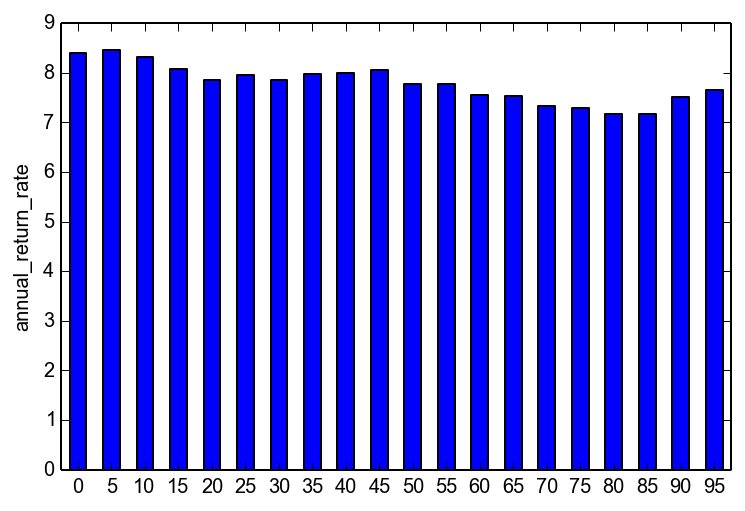

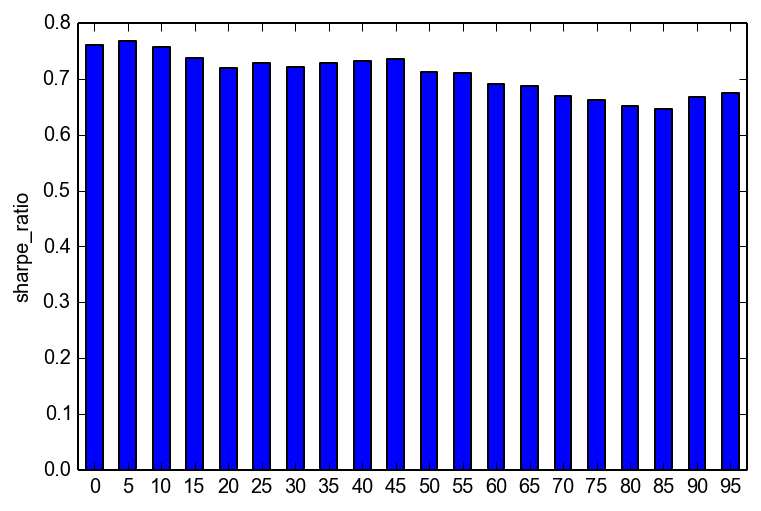

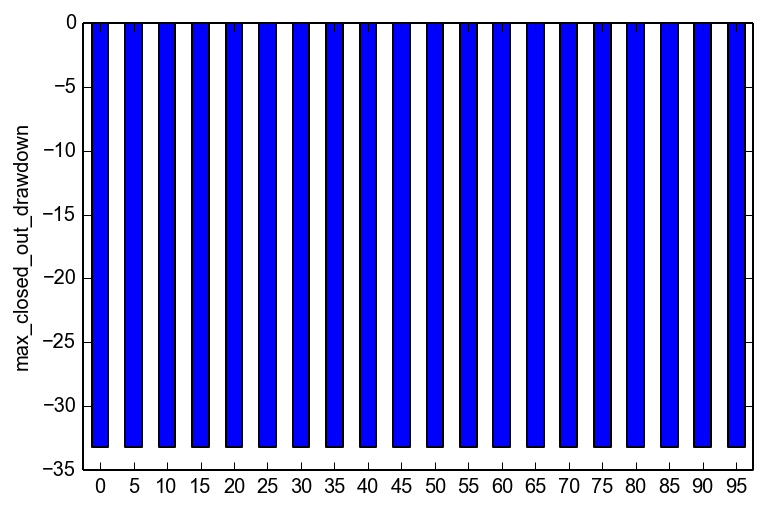

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-10-18 00:00:00 BUY  499 ^GSPC @ 20.01
2015-05-29 00:00:00 SELL 499.0 ^GSPC @ 2107.39


Equity curve

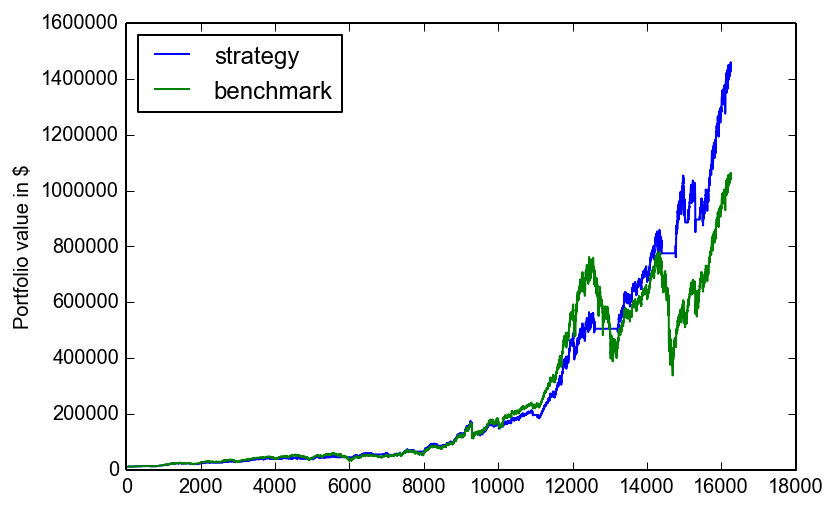

In [10]:
pf.plot_equity_curve(strategies['10'].dbal, benchmark=benchmark.dbal)